In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np
import os
import fnmatch
import csv
import datetime
import re
import seaborn as sns
import matplotlib.colors
import scipy.ndimage

import plotly.plotly as py
import plotly.graph_objs as go



In [4]:
# dictionary for key and coordinate values:
keyPosition = {}
keyPosition.setdefault('Suggestion1', [437, 110])
keyPosition.setdefault('Suggestion2', [785, 110])
keyPosition.setdefault('Suggestion3', [1134, 110])
keyPosition.setdefault('Suggestion4', [1483, 110])
keyPosition.setdefault('Suggestion5', [437, 110])
keyPosition.setdefault('Suggestion6', [785, 110])
keyPosition.setdefault('Suggestion7', [1134, 110])
keyPosition.setdefault('Suggestion8', [1483, 110])
keyPosition.setdefault('Suggestion9', [437, 110])
keyPosition.setdefault('Suggestion10', [785, 110])
keyPosition.setdefault('Suggestion11', [1134, 110])
keyPosition.setdefault('Suggestion12', [1483, 110])
keyPosition.setdefault('Suggestion13', [437, 110])
keyPosition.setdefault('Suggestion14', [785, 110])
keyPosition.setdefault('Suggestion15', [1134, 110])
keyPosition.setdefault('Suggestion16', [1483, 110])
keyPosition.setdefault('Suggestion17', [437, 110])
keyPosition.setdefault('Suggestion18', [785, 110])
keyPosition.setdefault('Suggestion19', [1134, 110])
keyPosition.setdefault('Suggestion20', [1483, 110])
keyPosition.setdefault('Suggestion21', [437, 110])
keyPosition.setdefault('Suggestion22', [785, 110])
keyPosition.setdefault('Suggestion23', [1134, 110])
keyPosition.setdefault('Suggestion24', [1483, 110])
keyPosition.setdefault('Suggestion25', [437, 110])
keyPosition.setdefault('Suggestion26', [785, 110])
keyPosition.setdefault('Suggestion27', [1134, 110])
keyPosition.setdefault('Suggestion28', [1483, 110])
keyPosition.setdefault('NextSuggestions', [1783, 110])

keyPosition.setdefault('PhraseTextBlock', [1000, 250])
keyPosition.setdefault('ScratchPad', [1000, 350])


keyPosition.setdefault('q', [87, 500])
keyPosition.setdefault('w', [262, 500])
keyPosition.setdefault('e', [437, 450])
keyPosition.setdefault('r', [611, 500])
keyPosition.setdefault('t', [785, 500])
keyPosition.setdefault('y', [960, 500])
keyPosition.setdefault('u', [1134, 450])
keyPosition.setdefault('i', [1309, 450])
keyPosition.setdefault('o', [1483, 450])
keyPosition.setdefault('p', [1658, 500])
keyPosition.setdefault('å', [1834, 500])
keyPosition.setdefault('a', [87, 704])
keyPosition.setdefault('s', [262, 630])
keyPosition.setdefault('d', [437, 704])
keyPosition.setdefault('f', [611, 704])
keyPosition.setdefault('g', [785, 704])
keyPosition.setdefault('h', [960, 630])
keyPosition.setdefault('j', [1134, 704])
keyPosition.setdefault('k', [1309, 704])
keyPosition.setdefault('l', [1483, 704])
keyPosition.setdefault('æ', [1658, 704])
keyPosition.setdefault('ø', [1832, 704])
keyPosition.setdefault('z', [262, 900])
keyPosition.setdefault('x', [437, 900])
keyPosition.setdefault('c', [611, 900])
keyPosition.setdefault('v', [785, 900])
keyPosition.setdefault('b', [960, 900])
keyPosition.setdefault('n', [1134, 900])
keyPosition.setdefault('m', [1309, 900])
keyPosition.setdefault('IncreaseDwellTime', [87, 1096])
keyPosition.setdefault('DecreaseDwellTime', [437, 1096])
keyPosition.setdefault('SpaceBar', [960, 1096])

[960, 1096]

In [5]:
maxR = 85

In [6]:
# function to convert list of date and time into datetime format list

def timeConversion(timeStrList):
    timeList = list()
    for time in timeStrList:
        time1, t1, t2 = time.partition('+')
        timeList.append(datetime.datetime.strptime(re.sub('[:.T]','-',time1[:-1]), "%Y-%m-%d-%H-%M-%S-%f"))
    return timeList

In [7]:
# This function will return the datetime in items which is the closest to the date pivot
def nearestTimePoint(dates, date):
    
    for d in dates:
        if d > date:
            nearestTP = d
            break
        else:
            continue
    try: 
        nearestTP
        nearestTPind = dates.index(nearestTP)
    except:
        nearestTP = 0
        nearestTPind = -1
        
    return nearestTP, nearestTPind

In [8]:
def ComputeDwellTime(TimeDwellChanges, TimeDwellOrig):
    
    TimeDwellNew = TimeDwellOrig
    #TimeDwellChanges = [key for key in userKeys if key[1] in KeyInclude]
    TimeDwellChangeInfo= list()
    pctChangeIndList = list()
    TimeDwellNewList = [TimeDwellOrig]
    #print(TimeDwellChanges)
    indPrev = 0
    flagFirst = 0
    for pctChangeInd in range(0, len(TimeDwellChanges)):
        
        if 'DwellTime' in TimeDwellChanges[pctChangeInd][1]:
            
            if float(TimeDwellChanges[pctChangeInd][2]) == 1:
                if 'Increase' in TimeDwellChanges[pctChangeInd][1]:
                    
                    TimeDwellNew = TimeDwellNew + 100
                    TimeDwellNewList.append(TimeDwellNew)
                    if flagFirst == 0:
                        pctChangeIndList.append(pctChangeInd)
                        indPrev = pctChangeInd
                        flagFirst = 1
                    else:
                        pctChangeIndList.append(pctChangeInd-indPrev)
                        indPrev = pctChangeInd
                        
                    
                else:
                    TimeDwellNew = TimeDwellNew - 100
                    TimeDwellNewList.append(TimeDwellNew)
                    if flagFirst == 0:
                        pctChangeIndList.append(pctChangeInd)
                        indPrev = pctChangeInd
                        flagFirst = 1
                    else:
                        pctChangeIndList.append(pctChangeInd-indPrev)
                        indPrev = pctChangeInd
                        
        
        if pctChangeInd == len(TimeDwellChanges)-1:
            pctChangeIndList.append(len(TimeDwellChanges)-indPrev)
    
    return [pctChangeIndList]+[TimeDwellNewList]

In [9]:
def KeysLookedAt(LetterLookedAt):
    
    LetterLookingAt = list()
    LetterLookingAtList = list()
    LetterListNew = list()
    
    #print(LetterLookedAt)
    
    #print(len(LetterLookedAt))
    
    for keyInd in range(0, len(LetterLookedAt)):
        
        if keyInd == 0:
            theLetter = LetterLookedAt[keyInd][1]
            LetterLookingAt.append(LetterLookedAt[keyInd])
            continue
                      
        checkLetter = LetterLookedAt[keyInd][1]
        pctChangeCurrent = float(LetterLookedAt[keyInd][2])
        pctChangePrevious = float(LetterLookedAt[keyInd-1][2])
        
        if theLetter != checkLetter:
            #print(theLetter, checkLetter)
            theLetter = checkLetter
            LetterLookingAtList.append(LetterLookingAt)
            LetterLookingAt = list()
            LetterLookingAt.append(LetterLookedAt[keyInd])
            
        else:
            
            if pctChangeCurrent < pctChangePrevious and keyInd!=1 and pctChangePrevious!=0:
                
                theLetter = checkLetter
                LetterLookingAtList.append(LetterLookingAt)
                LetterLookingAt = list()
                LetterLookingAt.append(LetterLookedAt[keyInd])
            else:
                LetterLookingAt.append(LetterLookedAt[keyInd])
        if keyInd == len(LetterLookedAt)-1:
            LetterLookingAtList.append(LetterLookingAt)
            
    #print(LetterLookingAtList)
    
    for keyInd in range(0, len(LetterLookingAtList)):
        
        for progressInd in range(0, len(LetterLookingAtList[keyInd])):
            
            if float(LetterLookingAtList[keyInd][progressInd][2]) == 1:
                if progressInd < len(LetterLookingAtList[keyInd])-1:
                    LetterListNew.append(list(LetterLookingAtList[keyInd][progressInd+1:]))
                    continue
            
    LetterListCompl = LetterLookingAtList + LetterListNew
    LetterListRed = [key[-1] for key in LetterListCompl]
    LettersRed = [key[1] for key in LetterListRed]
    PositionListFinal = list()

    
    for x in set(LettersRed):
        
        timeInc = 0
        if LettersRed.count(x) > 1:
            
            LetterIndices = [index for index, value in enumerate(LettersRed) if value == x]
            
            for letterCountInd in LetterIndices:
                # Compute total time
                timeInc = timeInc + LetterListRed[letterCountInd][2]
        else:
            timeInc = LetterListRed[LettersRed.index(x)][2]
            
        PositionListFinal.append([keyPosition[x], timeInc, x])
        
    print(PositionListFinal)
    return PositionListFinal

In [10]:
keyNumber = {}
keyNumber.setdefault('h', 1)
keyNumber.setdefault('o', 2)
keyNumber.setdefault('u', 3)
keyNumber.setdefault('s', 4)
keyNumber.setdefault('e', 5)



5

j
0:00:04.432424
[[[1483, 450], 189.7773, 'o'], [[262, 630], 38.104, 's'], [[1134, 450], 192.1934, 'u'], [[960, 630], 926.2008, 'h'], [[437, 450], 1050.6687, 'e']]


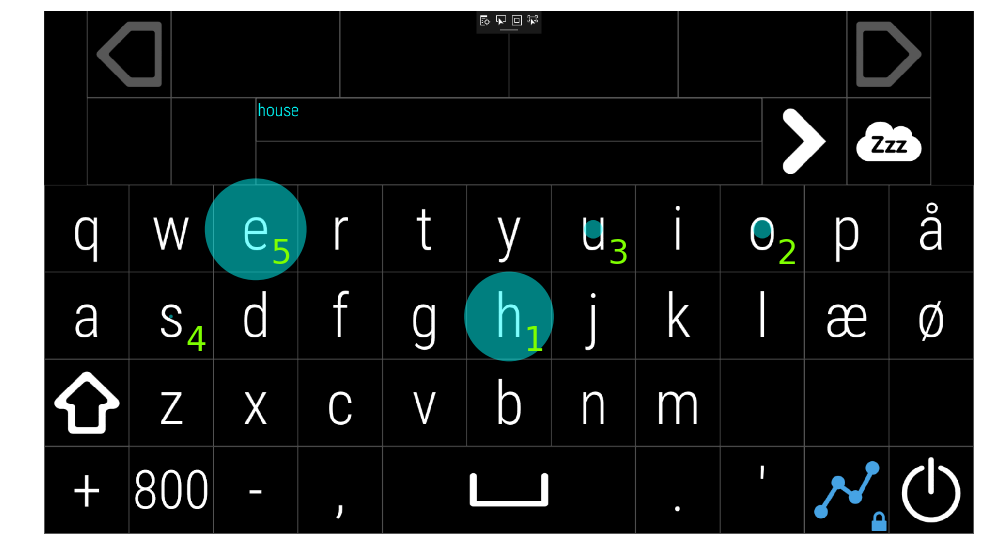

In [11]:
subj1 = [r'C:\DTU\Data\201805_HealthnRehab\TypingData\May16\pgba_DT\OptiKeyLogs\2018-5-16-14-50-56']
subj2 = [r'C:\DTU\Data\201805_HealthnRehab\TypingData\May17\jek_MS\OptiKeyLogs\2018-5-17-13-38-4']
subjMS = [r'C:\Users\taba\Desktop\Optikey\OptiKeyLogs\2018-6-18-23-43-19']
subjDT = [r'C:\Users\taba\Desktop\Optikey\OptiKeyLogs\2018-6-18-23-43-57']
#phraseSearch = 'præsidentvalget er meget travlt'
phraseSearch = 'house'
phraseUserLooksStop = 'NextPhrase'


# First find the time when the phrase is to be typed
# Secondly, find the time closest to that time in user keys and start checking, till next phrase
# Find those keys in the keyPosition dictionary and plot the circles

# S1: 
userKeys = None
stimPhrase = None
for folder in subjMS:
    phraseUserLooksAt = list()
    
    for file in os.listdir(folder):

        if fnmatch.fnmatchcase(file, 'user_looks_at_key*'):
            try:
                fUserKey = open(folder + '\\' + file, encoding='utf-8')
                readerUserKey = csv.reader(fUserKey)
                userKeys = list(readerUserKey)
                userKeys.remove(userKeys[0]) 
            except:
                if fUserKey is not None:
                    fUserKey.close()
                else:
                    print('error in opening the user looks at file')
                    
        elif fnmatch.fnmatch(file, 'PhraseLog*'):
            try:
                fStimPhrase = open(folder + '\\' + file, encoding='utf-8')
                readerStimPhrase = csv.reader(fStimPhrase)
                stimPhrase = list(readerStimPhrase)
                stimPhrase.remove(stimPhrase[0])
            except:
                if fStimPhrase is not None:
                    fStimPhrase.close()
                else:
                    print('error in opening the phrase log file')
        else:
            continue
        

        # if all these lists exist:
        if userKeys is not None and stimPhrase is not None:
            TimeDwellOrig = 800
            
            # Find phrase in stimPhrase:
            timePhraseStartStr = [phrase[0] for phrase in stimPhrase if phrase[1] in phraseSearch]
            time1, t1, t2 = timePhraseStartStr[0].partition('+')
            timePhraseStart = datetime.datetime.strptime(re.sub('[:.T]','-',time1[:-1]), "%Y-%m-%d-%H-%M-%S-%f")                
            
                
            # Find the time again in userKeys:
            timeStrUserKeys = [item[0] for item in userKeys]
            timeUserKeys = timeConversion(timeStrUserKeys)
            timeUserLooksStart, indUserLooksStart = nearestTimePoint(timeUserKeys, timePhraseStart)
            
            
            indNextPhrase = indUserLooksStart+1
            while userKeys[indNextPhrase][1] in 'NextPhrase':
                indUserLooksStart = indUserLooksStart + 1
                timeUserLooksStart = userKeys[indUserLooksStart]
                indNextPhrase = indNextPhrase + 1
            indUserLooksStart = 0
            # Dwell time and when it changes
            DwellTimeInfo = ComputeDwellTime(userKeys, TimeDwellOrig)
            
            DwellTimeList = []
            # Find when it changes, and as soon as it does, 
            if DwellTimeInfo is not None:
                for ch in range(0, len(DwellTimeInfo[0])):
                    DwellTimeList = DwellTimeList + [DwellTimeInfo[1][ch]]*DwellTimeInfo[0][ch]
                    
            timeStart2 = userKeys[indUserLooksStart+1][0]
            timeStart1, t1, t2 = timeStart2.partition('+')
            timeStart = datetime.datetime.strptime(re.sub('[:.T]','-',timeStart1[:-1]), "%Y-%m-%d-%H-%M-%S-%f")
            

            # Obtain the keys looked at by the user for the relevant phrase
            for itemInd in range(indUserLooksStart+1, len(userKeys)):
                
                if userKeys[itemInd][1] == phraseUserLooksStop:
                    indUserLooksStop = itemInd
                    break
                else:
                    phraseUserLooksAt.append(userKeys[itemInd][0:-1] + [float(userKeys[itemInd][2])*DwellTimeList[itemInd]])

            #print(indUserLooksStop)
            # Total time taken
            timeEnd1, t1, t2 = phraseUserLooksAt[-1][0].partition('+')
            timeEnd = datetime.datetime.strptime(re.sub('[:.T]','-',timeEnd1[:-1]), "%Y-%m-%d-%H-%M-%S-%f")
                
            timeDiff = timeEnd - timeStart
            print(timeDiff) 
            # Divide complete list into list of letters and then to list of letters at different fixation times
            KeyLookedAt = KeysLookedAt(phraseUserLooksAt)
            
            # Create 2D array for gaussian filter
            position2D = np.zeros([1200, 1920])
            for key in KeyLookedAt:
                x = key[0][0]
                y = key[0][1]
                position2D[y][x] = key[1]
            
            progressMax = 800+300
            
            # Gaussian filter
            #b = scipy.ndimage.filters.gaussian_filter(position2D, sigma = (50, 50))
            #extent = 1920, 0, 1200, 0            
            
            # Plot the image overlay
            im = np.array(Image.open('optikeyKeyboard.png'), dtype=np.uint8)
            dpi = 80
            #fig, ax = plt.subplots(figsize=(1920/dpi,1200/dpi), dpi = dpi)
            fig, ax = plt.subplots(figsize=(15,9), dpi = dpi)
            
            ax.imshow(im)
            
            # Plot heatmap 
            #fig, ax = plt.subplots(figsize=(15,9), dpi = dpi)
#            ax.imshow(b, alpha=.4, interpolation='bilinear', vmin=np.min(b), vmax = np.max(b), cmap='Pastel1')
            #ax.imshow(b, alpha=.4, interpolation='bilinear', cmap='Pastel1')

            plt.axis('off')
            nNum = 0
            # Create a Rectangle patch
            for key in KeyLookedAt:
                nNum = nNum + 1
                rect = patches.Circle(key[0], key[1]/10, linewidth=1, facecolor=(0,1,1), alpha = 0.5)
                # Add the patch to the Axes
                ax.add_patch(rect)
                ax.annotate(str(keyNumber[key[2]]), xy = np.add(key[0],[30,70]), size = 30, color = (127/255,1,0))
#                ax.annotate("",
#                    xy=np.add(key[0], [((key[1])/progressMax)*20,((key[1])/progressMax)*20 ]) , xycoords='data',
#                    xytext=(100, 100), textcoords='data',
#                    arrowprops=dict(arrowstyle="fancy", #linestyle="dashed",
#                    color="0.5"))
            #plt.show()    
                
        else:
            print('j')
        

# S2:


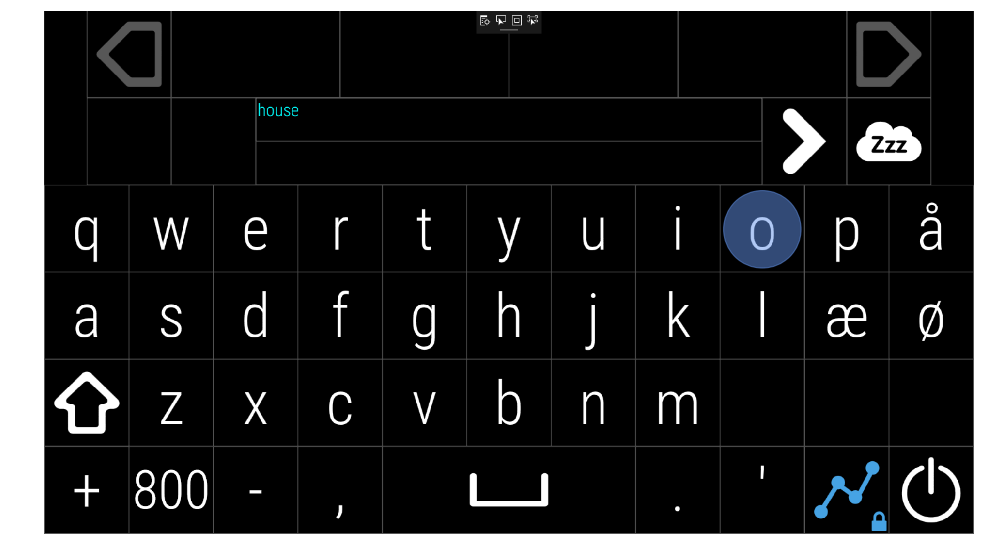

In [12]:
#im = np.array(Image.open('keyboard.png'))
im = np.array(Image.open('optikeyKeyboard.png'), dtype=np.uint8)

# Create figure and axes
dpi = 80
fig, ax = plt.subplots(figsize=(15,9), dpi = dpi)

# Display the image
ax.imshow(im)

# Create a Rectangle patch
rect = patches.Circle([1483, 450], 80,linewidth=1, edgecolor='Cornflowerblue', facecolor='Cornflowerblue', alpha = 0.5)

# Add the patch to the Axes
ax.add_patch(rect)


plt.axis('off')

plt.show()

In [22]:
vmax = np.max(position2D)
print(vmax)

1987.018


In [24]:
vmax = np.max(position2D)
print(vmax)

4411.4411


In [ ]:
b = scipy.ndimage.filters.gaussian_filter(a, 250, order=3)
extent = 0, 1920, 0, 1200

In [ ]:
im = np.array(Image.open('optikeyKeyboard.png'), dtype=np.uint8)

# Create figure and axes
dpi = 80
fig, ax = plt.subplots(figsize=(1920/dpi, 1200/dpi), dpi = dpi)

# Display the image
ax.imshow(im, origin='lower')


height, width, channels = plt.imread('optikeyKeyboard.png').shape
print(height, width, channels)

#fig, ax = plt.subplots(figsize=(15,9), dpi = dpi)
plt.imshow(b, alpha=.7, interpolation='bilinear', 
                 extent=extent)
plt.axis('off')

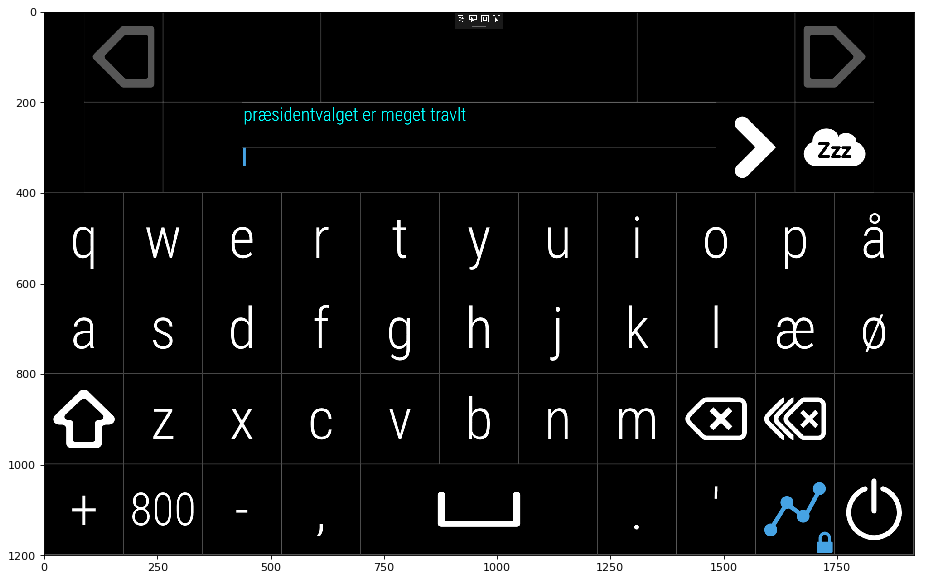

In [38]:
im = np.array(Image.open('optikeyKeyboard.png'), dtype=np.uint8)
dpi = 80
#fig, ax = plt.subplots(figsize=(1920/dpi,1200/dpi), dpi = dpi)
fig, ax = plt.subplots(figsize=(15,9), dpi = dpi)
ax.imshow(im)

In [42]:
np.shape(b)

(1920, 1200)

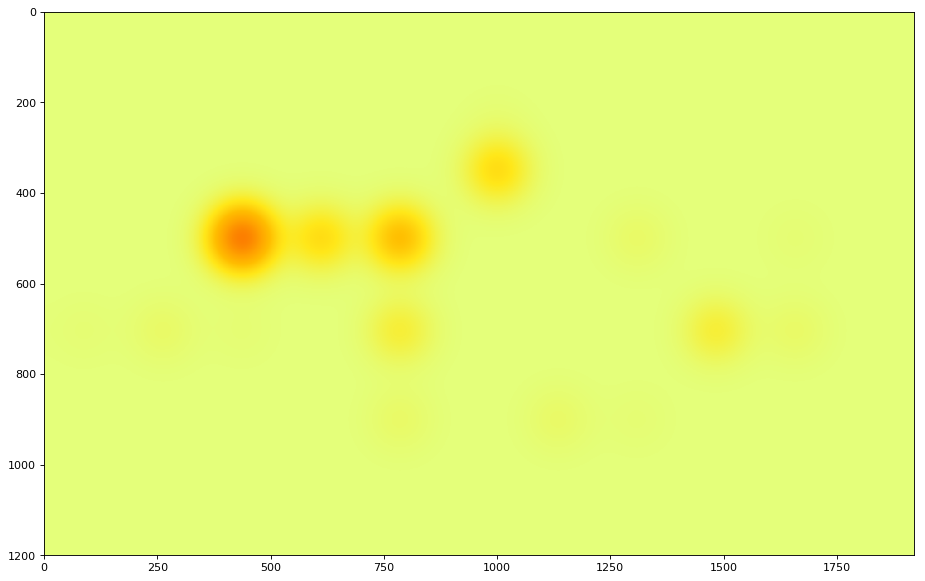

In [71]:
cdict = {
  'red'  :  ( (0.0, 0.25, .25), (0.02, .59, .59), (1., 1., 1.)),
  'green':  ( (0.0, 0.0, 0.0), (0.02, .45, .45), (1., .97, .97)),
  'blue' :  ( (0.0, 1.0, 1.0), (0.02, .75, .75), (1., 0.45, 0.45))
}

#cm = m.colors.LinearSegmentedColormap('my_colormap', cdict, 1024)


b = scipy.ndimage.filters.gaussian_filter(position2D, sigma = (50, 50))
fig, ax = plt.subplots(figsize=(15,9), dpi = dpi)
#ax.imshow(b)
ax.imshow(b, vmin=np.min(b), vmax = np.max(b), cmap='Wistia')

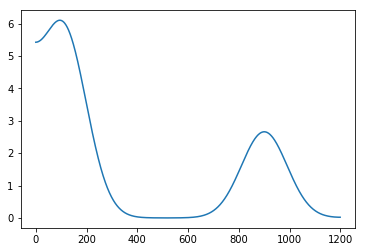

In [30]:
plt.plot( scipy.ndimage.filters.gaussian_filter(position2D[:,1134], sigma = 90))

In [109]:
print(b)

[[0.         0.         0.         ... 0.00274201 0.00272796 0.00272093]
 [0.         0.         0.         ... 0.00274627 0.00273219 0.00272516]
 [0.         0.         0.         ... 0.00275478 0.00274067 0.00273361]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [57]:
response = six.moves.urllib.request.urlopen('https://raw.githubusercontent.com/plotly/datasets/master/custom_heatmap_colorscale.json')
dataset = json.load(response)

data = [
    go.Heatmap(
        z=dataset['z'],
        colorscale=[[0.0, 'rgb(165,0,38)'], [0.1111111111111111, 'rgb(215,48,39)'], [0.2222222222222222, 'rgb(244,109,67)'],
        [0.3333333333333333, 'rgb(253,174,97)'], [0.4444444444444444, 'rgb(254,224,144)'], [0.5555555555555556, 'rgb(224,243,248)'],
        [0.6666666666666666, 'rgb(171,217,233)'],[0.7777777777777778, 'rgb(116,173,209)'], [0.8888888888888888, 'rgb(69,117,180)'],
        [1.0, 'rgb(49,54,149)']],
        colorbar = dict(
            title = 'Surface Heat',
            titleside = 'top',
            tickmode = 'array',
            tickvals = [2,50,100],
            ticktext = ['Hot','Mild','Cool'],
            ticks = 'outside'
        )
    )
]

py.iplot(data, filename='custom-colorscale-colorbar')

Aw, snap! We didn't get a username with your request.

Don't have an account? https://plot.ly/api_signup

Questions? accounts@plot.ly


PlotlyError: Because you didn't supply a 'file_id' in the call, we're assuming you're trying to snag a figure from a url. You supplied the url, '', we expected it to start with 'https://plot.ly'.
Run help on this function for more information.

In [56]:
data = [
    go.Contour(
        z=[[10, 10.625, 12.5, 15.625, 20],
           [5.625, 6.25, 8.125, 11.25, 15.625],
           [2.5, 3.125, 5., 8.125, 12.5],
           [0.625, 1.25, 3.125, 6.25, 10.625],
           [0, 0.625, 2.5, 5.625, 10]],
        colorscale='Jet',
    )
]

py.iplot(data, filename='simple-colorscales-colorscale')

Aw, snap! We didn't get a username with your request.

Don't have an account? https://plot.ly/api_signup

Questions? accounts@plot.ly


PlotlyError: Because you didn't supply a 'file_id' in the call, we're assuming you're trying to snag a figure from a url. You supplied the url, '', we expected it to start with 'https://plot.ly'.
Run help on this function for more information.

In [36]:
print(phraseUserLooksAt)

[['2018-06-18T23:44:02.2675805+02:00', 'o', 26.578699999999998], ['2018-06-18T23:44:02.2816175+02:00', 'o', 40.4122], ['2018-06-18T23:44:02.2951900+02:00', 'o', 54.0142], ['2018-06-18T23:44:02.3086901+02:00', 'o', 67.5474], ['2018-06-18T23:44:02.3222260+02:00', 'o', 81.08030000000001], ['2018-06-18T23:44:02.3402751+02:00', 'o', 98.5627], ['2018-06-18T23:44:02.3518061+02:00', 'o', 110.7907], ['2018-06-18T23:44:02.3778754+02:00', 'o', 137.1693], ['2018-06-18T23:44:02.3914113+02:00', 'o', 150.7622], ['2018-06-18T23:44:02.4054479+02:00', 'o', 164.73839999999998], ['2018-06-18T23:44:02.4195193+02:00', 'o', 178.77609999999999], ['2018-06-18T23:44:02.4345243+02:00', 'o', 192.8134], ['2018-06-18T23:44:02.4480610+02:00', 'o', 206.85039999999998], ['2018-06-18T23:44:02.4621523+02:00', 'h', 0.0], ['2018-06-18T23:44:02.4637635+02:00', 'o', 222.9218], ['2018-06-18T23:44:02.4766360+02:00', 'o', 235.92719999999997], ['2018-06-18T23:44:02.4896693+02:00', 'o', 249.46229999999997], ['2018-06-18T23:44:02

In [57]:
phraseUserLooksAt.remove(['2018-06-18T23:43:27.1219878+02:00', 's', 0.0])